In [39]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np

# For visualisation 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Dependencies for preprocessing data for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

# Dependencies for nueural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Dependencies for SVR model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# # imports for database connection
# import sqlalchemy
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy import create_engine, func

# # import these to view table column headers & rows
# from sqlalchemy.orm import sessionmaker
# from sqlalchemy import select


In [40]:
# load in the files
file = Path("../Resources/HealthEcoColumns.csv")

# read the files
df= pd.read_csv(file)


In [41]:
# Check StringencyColumns.csv
print(df.dtypes)


Unnamed: 0                                 int64
date                                      object
iso_code                                  object
E1_Income support                        float64
E1_Flag                                  float64
E2_Debt/contract relief                  float64
E3_Fiscal measures                       float64
E4_International support                 float64
H1_Public information campaigns          float64
H1_Flag                                  float64
H2_Testing policy                        float64
H3_Contact tracing                       float64
H4_Emergency investment in healthcare    float64
H5_Investment in vaccines                float64
total_cases                              float64
total_deaths                             float64
new_cases                                float64
new_deaths                               float64
dtype: object


In [42]:
df.columns

Index(['Unnamed: 0', 'date', 'iso_code', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths'],
      dtype='object')

In [43]:
# Encode the date column to int
le = LabelEncoder()
df['date'] = le.fit_transform(df['date'])
print(df.dtypes)


Unnamed: 0                                 int64
date                                       int32
iso_code                                  object
E1_Income support                        float64
E1_Flag                                  float64
E2_Debt/contract relief                  float64
E3_Fiscal measures                       float64
E4_International support                 float64
H1_Public information campaigns          float64
H1_Flag                                  float64
H2_Testing policy                        float64
H3_Contact tracing                       float64
H4_Emergency investment in healthcare    float64
H5_Investment in vaccines                float64
total_cases                              float64
total_deaths                             float64
new_cases                                float64
new_deaths                               float64
dtype: object


In [44]:
# Selecting only the relevant columns (minus the flags and H1;part of stringency Index)

df=df[['date', 'iso_code', 'E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support','H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]

df

,date,iso_code,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,total_cases,total_deaths,new_cases,new_deaths
0,72,ABW,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1,78,ABW,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
2,79,ABW,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0
3,80,ABW,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
4,81,ABW,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48523,239,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6251.0,179.0,55.0,13.0
48524,240,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6292.0,189.0,41.0,10.0
48525,241,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6388.0,195.0,96.0,6.0
48526,242,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6406.0,196.0,18.0,1.0


In [45]:
# Checking corr for between "income support" and the target variables.
df[['E1_Income support','total_cases', 'total_deaths', 'new_cases', 'new_deaths']].corr()

# Finindg:Its a moderate positive corr

,E1_Income support,total_cases,total_deaths,new_cases,new_deaths
E1_Income support,1.000000,0.335554,0.420125,0.448207,0.449755
total_cases,0.335554,1.000000,0.965935,0.893323,0.558573
total_deaths,0.420125,0.965935,1.000000,0.903863,0.624765
new_cases,0.448207,0.893323,0.903863,1.000000,0.721106
new_deaths,0.449755,0.558573,0.624765,0.721106,1.000000


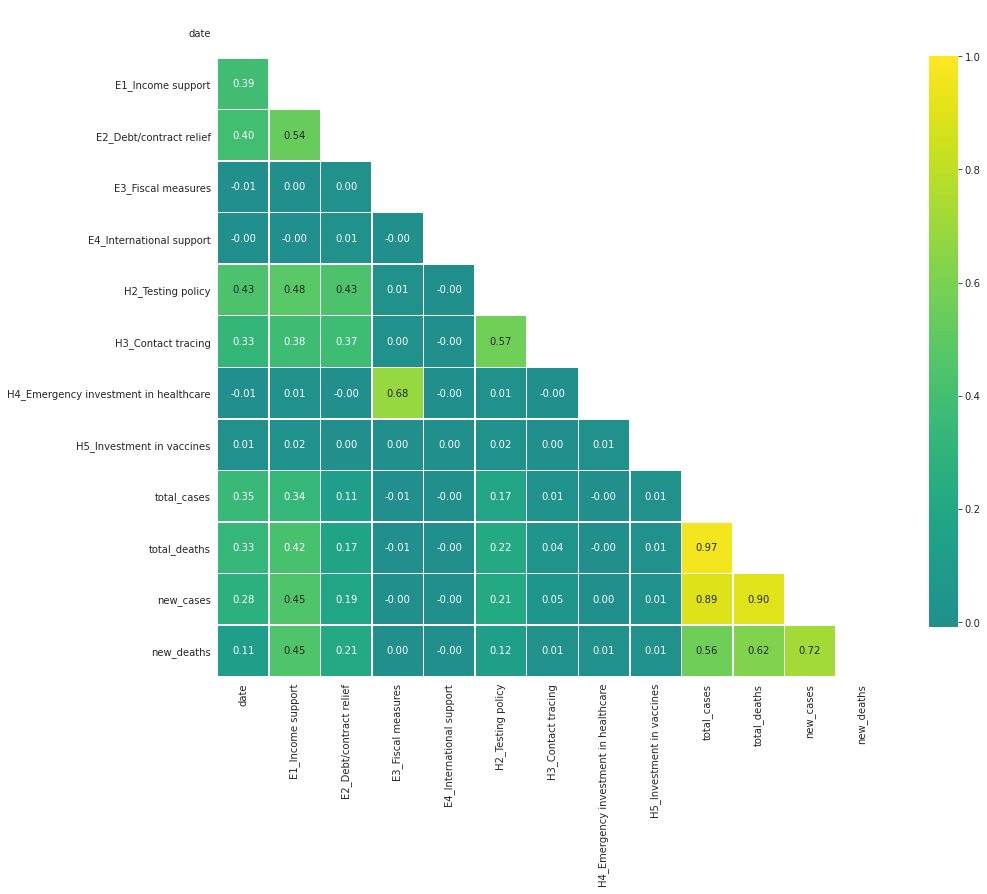

In [46]:
# Checking correlation for feature selection.

def correlation_heatmap(df):
    correlations = df.corr()
    mask = np.zeros_like(correlations)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):

        fig, ax = plt.subplots(figsize=(15,15))
        sns.heatmap(correlations,cmap='viridis', mask=mask,vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

# DF Total Deaths

In [47]:
# Create a df to test impact of some features on 'total deaths'(isolating on index features to see their impact)
df_td=df[['E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support','H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'total_deaths']]

df_td.head()

,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,total_deaths
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


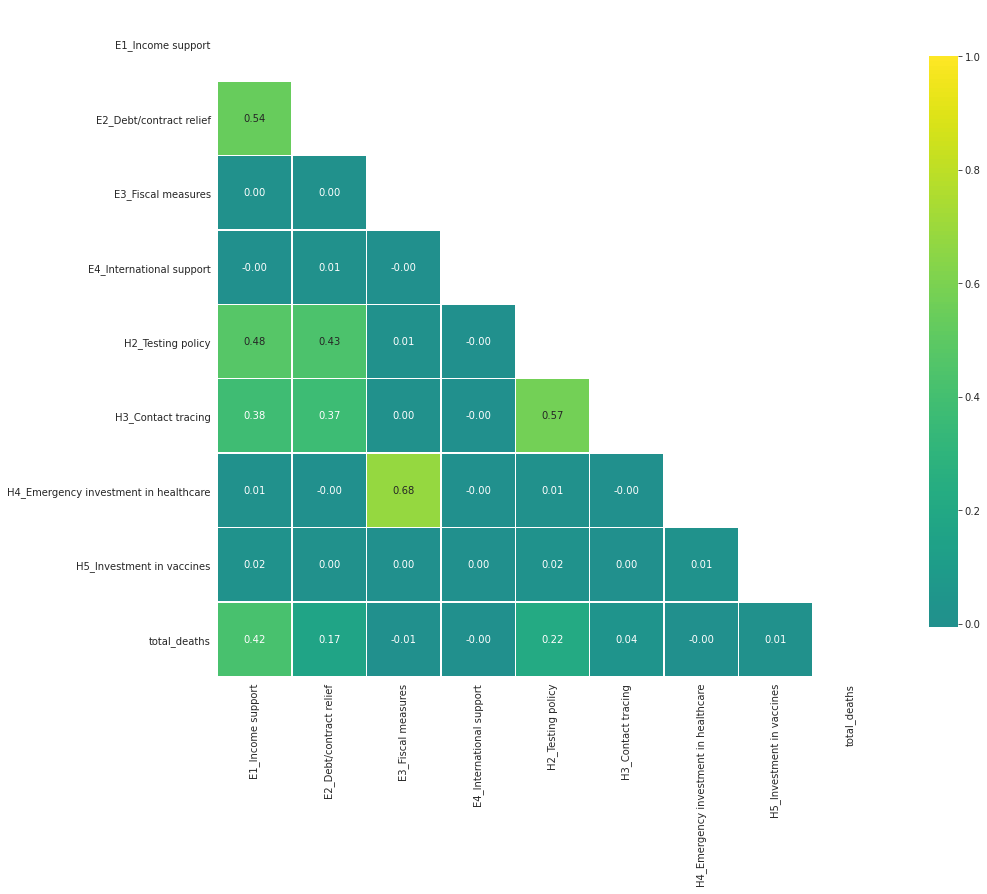

In [48]:
correlation_heatmap(df_td)


In [49]:
df_td.dtypes

E1_Income support                        float64
E2_Debt/contract relief                  float64
E3_Fiscal measures                       float64
E4_International support                 float64
H2_Testing policy                        float64
H3_Contact tracing                       float64
H4_Emergency investment in healthcare    float64
H5_Investment in vaccines                float64
total_deaths                             float64
dtype: object

# RandomForestRegressor


In [50]:
# create features(X) and target(y) sets
X = df_td.drop(['total_deaths'],axis=1).values

y = df_td['total_deaths'].values
y = y.reshape(-1,1)

In [51]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.68235 and the r2_score is:0.307
------------------------------------
Feature: 0, Score: 0.52062
Feature: 1, Score: 0.15816
Feature: 2, Score: 0.01108
Feature: 3, Score: 0.00123
Feature: 4, Score: 0.24021
Feature: 5, Score: 0.05347
Feature: 6, Score: 0.01033
Feature: 7, Score: 0.00490
--------------------------------------


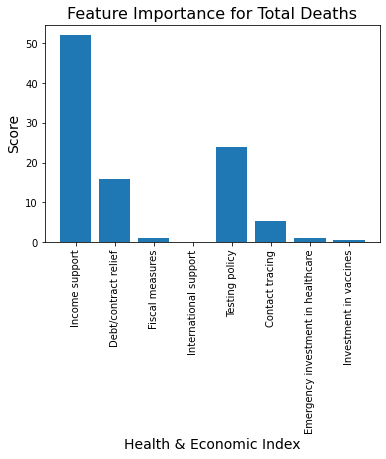

In [60]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =[ 'Income support',
       'Debt/contract relief', 'Fiscal measures',
       'International support','Testing policy', 'Contact tracing',
       'Emergency investment in healthcare', 'Investment in vaccines']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Health & Economic Index', size=14)
plt.title('Feature Importance for Total Deaths', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_td(HE).png', bbox_inches='tight')
plt.show()

In [53]:
importance*100

array([60.27385359, 13.39749856,  0.88865685,  0.0890863 , 18.3971448 ,
        5.8085839 ,  0.74001808,  0.40515793])

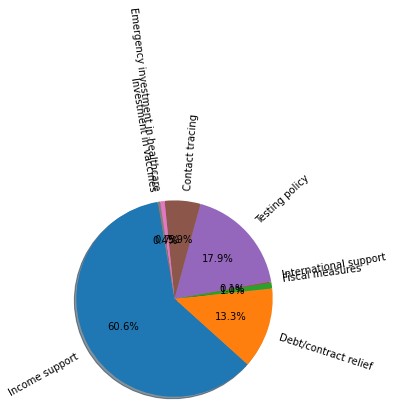

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = [60.55675638, 13.32086447,  1.01575692,  0.12869346, 17.93738565,
        5.88063721,  0.74596827,  0.41393765]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100,rotatelabels =True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Total cases Df

In [55]:
# Create a df to test impact of some features on 'total casess'
df_tc=df[['E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support','H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'total_cases']]
df_tc.head()

,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,total_cases
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0


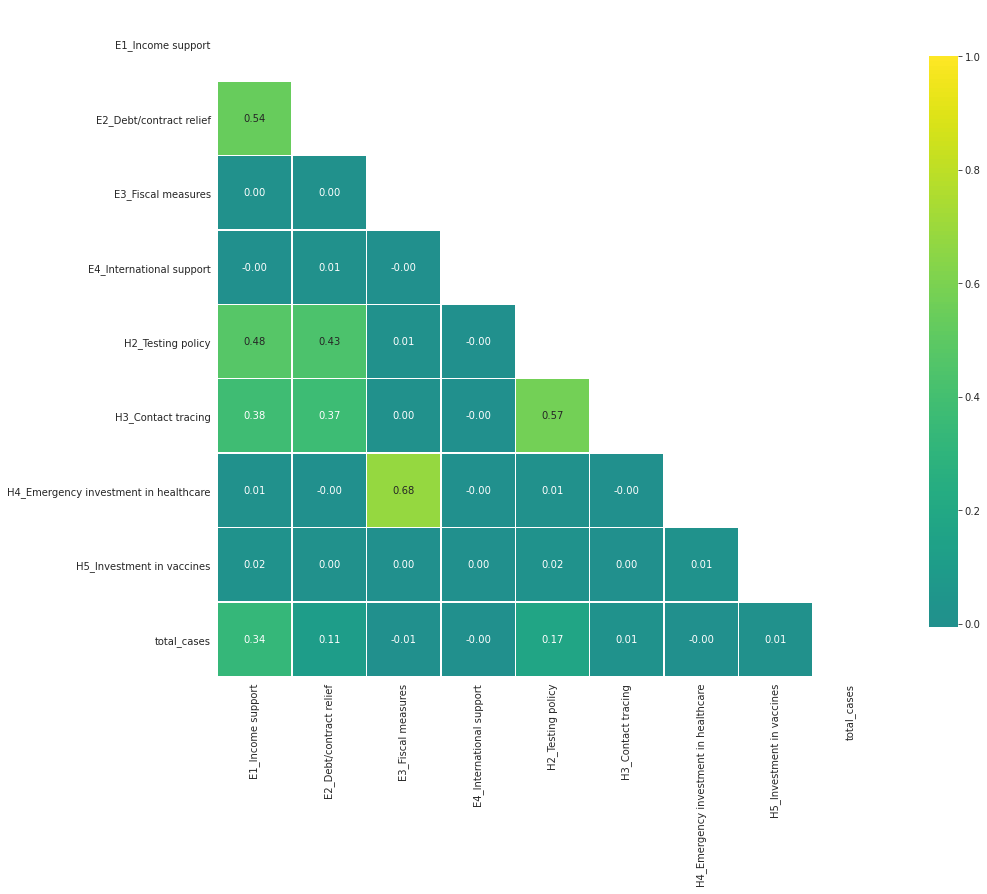

In [56]:
correlation_heatmap(df_tc)

# RandomForest Regressor

In [62]:
# create features(X) and target(y) sets
X = df_tc.drop(['total_cases'],axis=1).values

y = df_tc['total_cases'].values
y = y.reshape(-1,1)

In [63]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.74262 and the r2_score is:0.306
------------------------------------
Feature: 0, Score: 0.51768
Feature: 1, Score: 0.16239
Feature: 2, Score: 0.01063
Feature: 3, Score: 0.00138
Feature: 4, Score: 0.23840
Feature: 5, Score: 0.05392
Feature: 6, Score: 0.01035
Feature: 7, Score: 0.00524
--------------------------------------


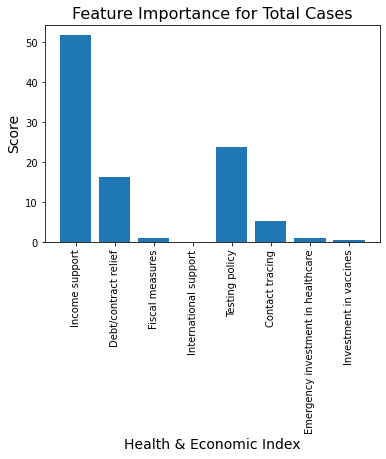

In [64]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =['Income support',
       'Debt/contract relief', 'Fiscal measures',
       'International support','Testing policy', 'Contact tracing',
       'Emergency investment in healthcare', 'Investment in vaccines']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Health & Economic Index', size=14)
plt.title('Feature Importance for Total Cases', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_tc(HE).png', bbox_inches='tight')
plt.show()

In [65]:
importance*100

array([51.76763047, 16.23941914,  1.06310623,  0.13788648, 23.84034534,
        5.39212634,  1.03518035,  0.52430566])

# DF New Deaths

In [69]:
# Create a df to test impact of some features on 'new deaths'
df_nd=df[['E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support','H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'new_deaths']]
df_nd.head()

,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,new_deaths
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


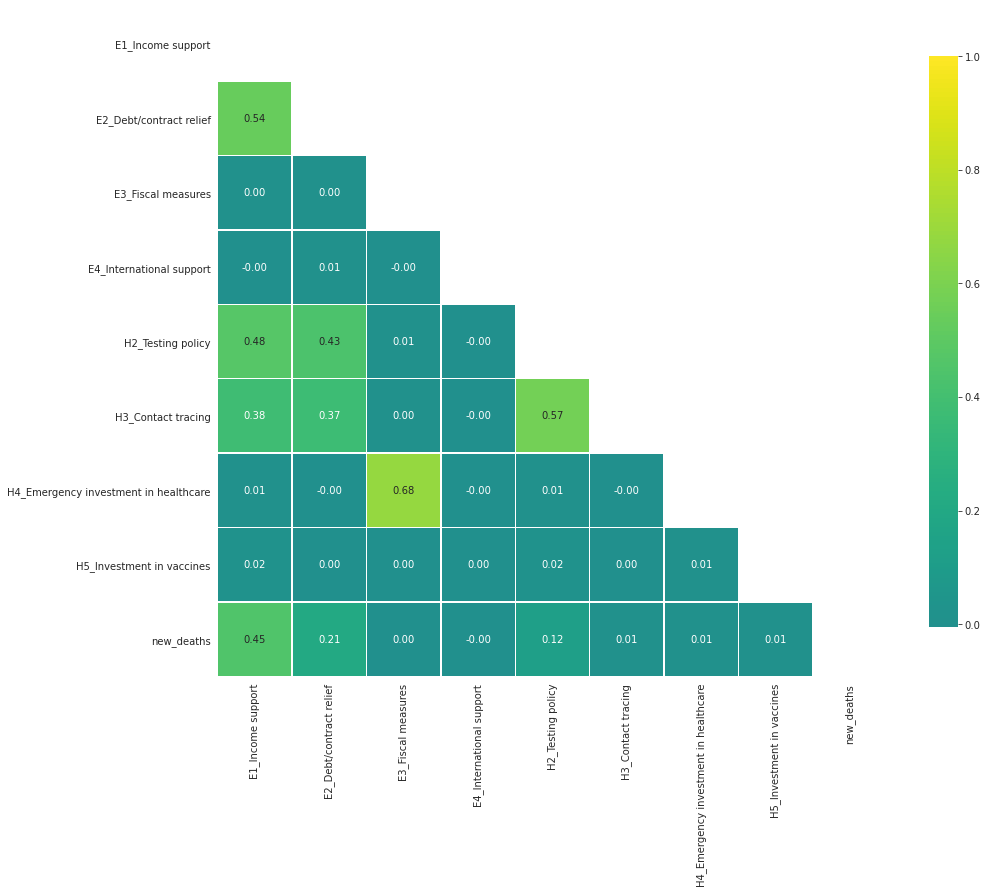

In [70]:
correlation_heatmap(df_nd)

# RandomForest Regressor

In [71]:
# create features(X) and target(y) sets
X = df_nd.drop(['new_deaths'],axis=1).values

y = df_nd['new_deaths'].values
y = y.reshape(-1,1)

In [72]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.62578 and the r2_score is:0.400
------------------------------------
Feature: 0, Score: 0.63954
Feature: 1, Score: 0.11709
Feature: 2, Score: 0.01745
Feature: 3, Score: 0.00120
Feature: 4, Score: 0.03013
Feature: 5, Score: 0.18373
Feature: 6, Score: 0.00777
Feature: 7, Score: 0.00310
--------------------------------------


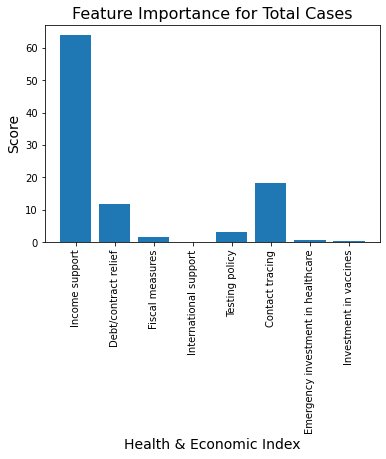

In [73]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =['Income support',
       'Debt/contract relief', 'Fiscal measures',
       'International support','Testing policy', 'Contact tracing',
       'Emergency investment in healthcare', 'Investment in vaccines']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Health & Economic Index', size=14)
plt.title('Feature Importance for Total Cases', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_nd(HE).png', bbox_inches='tight')
plt.show()

In [74]:
importance*100

array([63.9536582 , 11.7090362 ,  1.74456936,  0.11992299,  3.01282581,
       18.37282611,  0.77712945,  0.31003187])

# DF New Cases

In [84]:
# Create a df to test impact of some features on 'new deaths'
df_nc=df[['E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support','H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'new_cases']]
df_nc.head()

,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,new_cases
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


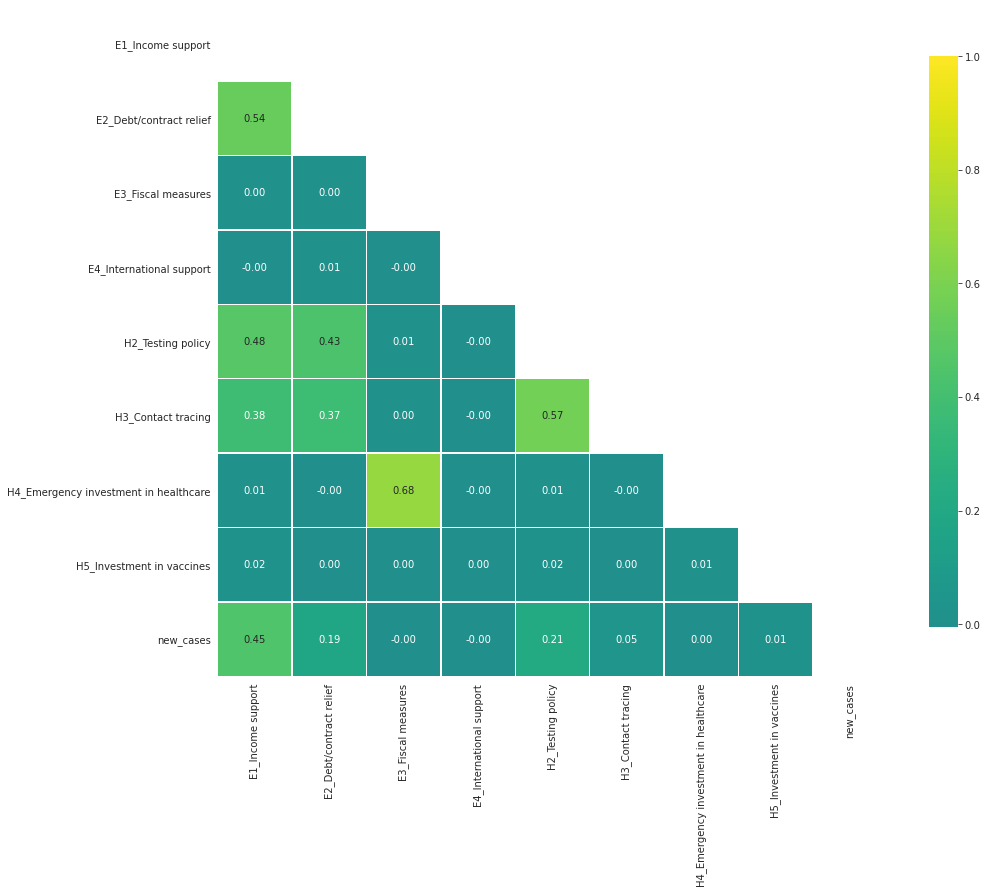

In [85]:
correlation_heatmap(df_nc)

# RandomForest Regressor

In [86]:
# create features(X) and target(y) sets
X = df_nc.drop(['new_cases'],axis=1).values

y = df_nc['new_cases'].values
y = y.reshape(-1,1)

In [87]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.64706 and the r2_score is:0.402
------------------------------------
Feature: 0, Score: 0.63798
Feature: 1, Score: 0.18507
Feature: 2, Score: 0.01291
Feature: 3, Score: 0.00102
Feature: 4, Score: 0.08613
Feature: 5, Score: 0.06407
Feature: 6, Score: 0.00785
Feature: 7, Score: 0.00497
--------------------------------------


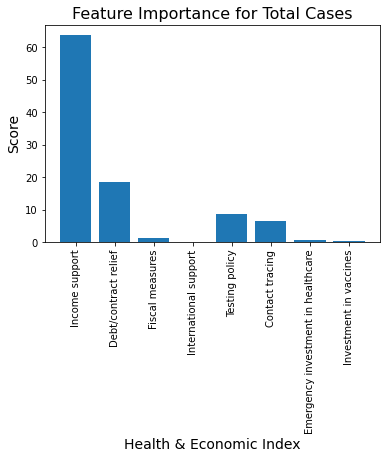

In [88]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =['Income support',
       'Debt/contract relief', 'Fiscal measures',
       'International support','Testing policy', 'Contact tracing',
       'Emergency investment in healthcare', 'Investment in vaccines']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Health & Economic Index', size=14)
plt.title('Feature Importance for Total Cases', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_nc(HE).png', bbox_inches='tight')
plt.show()

In [89]:
importance*100

array([63.79763404, 18.50680724,  1.29094518,  0.10188577,  8.61304861,
        6.40708792,  0.78517472,  0.49741651])